In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cirq
from tqdm import tqdm
from Shadow_Tomography import *


In [ ]:
#Colormap of log_10 Delta in function of N_U and N_S  (Fig.3 of https://arxiv.org/abs/2203.07309)
N = 5
N_U = np.logspace(2,4,5)
N_S =np.logspace(0,4,5)
observables =["ZZIII","IZZII","IIZZI","IIIZZ","XXXXX"]
n_ave = 2
p  = 0.
qubits = cirq.LineQubit.range(N)
circuit = base(qubits)

#Real State
simulator = cirq.Simulator()
simulation = simulator.simulate(circuit)
final_state = np.array([simulation.final_state_vector])
rho_actual = final_state.T@final_state
np.savetxt("rho_actual.txt",rho_actual)
T_actual = []
for obs in observables:
    O = 1.
    for o in obs:
        O = np.kron(obs_gate(o),O)
    T_actual.append(np.trace(rho_actual@O))
    
#Shadow Tomography
delta = []
for nsimu in tqdm(N_S):
    for nu in tqdm(N_U):
        delta_temp = []
        for _ in range(n_ave):
            rho_shadow = find_rho_N_U(circuit,qubits,N,int(nu),int(nsimu),probability=p)
            T_shadow = []
            for obs in observables:
                O = 1.
                for o in obs:
                    O = np.kron(obs_gate(o),O)
                T_shadow.append(np.trace(rho_shadow@O)/np.trace(rho_shadow))
            delta_temp.append(np.log10((np.sum([(T_actual[i]-T_shadow[i])**2 for i in range(len(observables))],axis =0))))
        delta.append(np.mean(delta_temp))
        np.savetxt('delta.out', delta)
print(delta)


font = {'family' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)


cs = plt.contourf(N_S, N_U, np.array(delta).reshape(len(N_U),len(N_S)), 
                  cmap ='plasma',
                  extend ='both',
                  alpha = 1)
  
cbar = plt.colorbar(cs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$N_S$')
plt.ylabel(r'$N_U$')
cbar.set_label(r'$\log_{10}(\Delta_{GHZ}^2)$')
plt.savefig("colormap_log_10(Delta)_p="+str(p)+".png")
plt.show()





100%|██████████| 1500/1500 [01:48<00:00, 13.89it/s]


obs rho: (0.9999999403953552+0j)
obs rho: (0.3596880000000001+0j)
obs rho2: (0.6113037333081747-1.3050027904830834e-20j)
obs rho3: (0.7819104114775448+2.739138554105676e-19j)
obs rho: (0.9999999403953552+0j)
obs rho: (0.27482399999999996+0j)
obs rho2: (0.5253088451165268+1.751211068149348e-21j)
obs rho3: (0.7220076047282502+1.0672904654057444e-18j)
obs rho: (0.9999999403953552+0j)
obs rho: (0.21595200000000003+0j)
obs rho2: (0.4573134377330077-4.109673685172444e-20j)
obs rho3: (0.6736135112766886+5.798673936644837e-19j)
obs rho: (0.9999999403953552+0j)
obs rho: (0.18480000000000002+0j)
obs rho2: (0.3850483871757533-3.099461290213597e-20j)
obs rho3: (0.5891741685472902-6.330137105740418e-19j)
obs rho: (0.9999999403953552+0j)
obs rho: (0.015551999999999996+0j)
obs rho2: (0.09117064938831597+3.035766082959413e-18j)
obs rho3: (0.19616342319199226-8.673617379884035e-19j)


100%|██████████| 1500/1500 [01:48<00:00, 13.87it/s]


obs rho: (0.9999999403953552+0j)
obs rho: (0.3284879999999999+0j)
obs rho2: (0.5786457270453649-7.169545482191733e-21j)
obs rho3: (0.753210738130989-7.21620057627205e-19j)
obs rho: (0.9999999403953552+0j)
obs rho: (0.26532+0j)
obs rho2: (0.5118424742360588+4.911557019793948e-20j)
obs rho3: (0.7080794112497634-1.451216717516287e-19j)
obs rho: (0.9999999403953552+0j)
obs rho: (0.215376+0j)
obs rho2: (0.4577752540124653+6.785738660500466e-20j)
obs rho3: (0.6715999110477743+8.19603101455054e-19j)
obs rho: (0.9999999403953552+0j)
obs rho: (0.19058400000000003+0j)
obs rho2: (0.3951386985500317+5.3791372450843533e-20j)
obs rho3: (0.5965702473607618+8.364985582414916e-19j)
obs rho: (0.9999999403953552+0j)
obs rho: (0.018144-1.734723475976807e-18j)
obs rho2: (0.0758886290613621-1.734723475976807e-18j)
obs rho3: (0.157548593131247+3.0342755320754973e-35j)


100%|██████████| 1500/1500 [01:50<00:00, 13.58it/s]


obs rho: (0.9999999403953552+0j)
obs rho: (0.40596+0j)
obs rho2: (0.6744587022525201+2.2682404138317136e-20j)
obs rho3: (0.8349937290634004+5.45788882938273e-19j)
obs rho: (0.9999999403953552+0j)
obs rho: (0.281832+0j)
obs rho2: (0.524795814288016+6.45246683649829e-20j)
obs rho3: (0.7208801629613216+3.688899800922129e-21j)
obs rho: (0.9999999403953552+0j)
obs rho: (0.22202400000000005+0j)
obs rho2: (0.4998982890043406+1.2723728914153686e-19j)
obs rho3: (0.7240846541380893+6.021802488597033e-20j)
obs rho: (0.9999999403953552+0j)
obs rho: (0.20148+0j)
obs rho2: (0.4350793928965025+1.2229925335042746e-19j)
obs rho3: (0.6456395035946481-2.0264969449695676e-19j)
obs rho: (0.9999999403953552+0j)
obs rho: (0.068688-8.673617379884035e-19j)
obs rho2: (0.13090856713828508-6.938893903907228e-18j)
obs rho3: (0.20936372090928845-3.469446951953614e-18j)


100%|██████████| 1500/1500 [01:52<00:00, 13.36it/s]
/Users/yanislefur/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/yanislefur/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/Users/yanislefur/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/yanislefur/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/yanislefur/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data

obs rho: (0.9999999403953552+0j)
obs rho: (0.367968+0j)
obs rho2: (0.6129269849848368+8.360406294283828e-20j)
obs rho3: (0.772084406105543+6.532113900880376e-19j)
obs rho: (0.9999999403953552+0j)
obs rho: (0.302976+0j)
obs rho2: (0.5545184687056025-7.369240312622552e-20j)
obs rho3: (0.7388560450579762+1.4738798060220775e-18j)
obs rho: (0.9999999403953552+0j)
obs rho: (0.18168+0j)
obs rho2: (0.3995017026311687-3.7354445172818136e-20j)
obs rho3: (0.6076064127878803+5.648889989298937e-20j)
obs rho: (0.9999999403953552+0j)
obs rho: (0.15854400000000002+0j)
obs rho2: (0.32743289582389573-7.212812778090686e-20j)
obs rho3: (0.5134665171640939+7.245331664260215e-19j)
obs rho: (0.9999999403953552+0j)
obs rho: (0.07322400000000001+1.734723475976807e-18j)
obs rho2: (0.15623187389134865-3.761145552438485e-36j)
obs rho3: (0.25226282452925686+1.2143064331837653e-17j)
{'ZZIII0': [(0.3596880000000001+0j), (0.3284879999999999+0j), (0.40596+0j), (0.367968+0j)], 'ZZIII1': [(0.6113037333081747-1.305002790

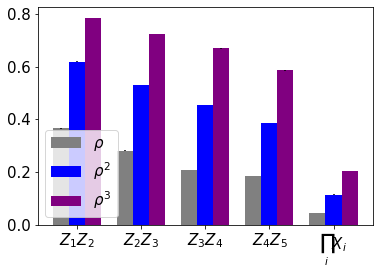

In [3]:
#Observable mean and variance (Fig.4 of https://arxiv.org/abs/2203.07309)

font = {'family' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)


N = 5
N_U = 1500
N_S = 500
nsimu = 10000
n_average = 4
qubits = cirq.LineQubit.range(N)
circuit =  base(qubits)
p = 0.1

observables = ["ZZIII","IZZII","IIZZI","IIIZZ","XXXXX"]
delta = {}
for obs in observables:
     for i in range(3):
          delta[obs+str(i)]=[]

simulator = cirq.Simulator()
simulation = simulator.simulate(circuit)
final_state = np.array([simulation.final_state_vector])
rho_actual = final_state.T@final_state
np.savetxt("rho_actual.txt",rho_actual)



for _ in range(n_average):
    rho_shadow =  find_rho_N_U(circuit,qubits,N,int(N_U),int(N_S),probability=p)
    rho_shadow2 = rho_shadow@rho_shadow
    rho_shadow3 = rho_shadow@rho_shadow2
    rho_shadow/=np.trace(rho_shadow)
    rho_shadow2/=np.trace(rho_shadow2)
    rho_shadow3/=np.trace(rho_shadow3)
    for obs in observables:
        O = 1.
        for o in obs:

            O = np.kron(obs_gate(o),O)
        print("obs rho:",np.trace(rho_actual@O))
        print("obs rho:",np.trace(rho_shadow@O)/np.trace(rho_shadow))
        print("obs rho2:",np.trace(rho_shadow2@O)/np.trace(rho_shadow2))
        print("obs rho3:",np.trace(rho_shadow3@O)/np.trace(rho_shadow3))
        delta[obs+str(0)].append(np.trace(rho_shadow@O)/np.trace(rho_shadow))
        delta[obs+str(1)].append(np.trace(rho_shadow2@O)/np.trace(rho_shadow2))
        delta[obs+str(2)].append(np.trace(rho_shadow3@O)/np.trace(rho_shadow3))

print(delta)
with open('delta.txt', 'w') as f:
    print(delta, file=f)

x1 = []
x2 = []
x3 = []
err_x1 = []
err_x2 = []
err_x3 = []
for obs in observables:
    for i in range(3):
        print("Mean"+obs+str(i)+": ",np.mean(delta[obs+str(i)]),"var"+obs+str(i)+": ",np.var(delta[obs+str(i)]))
    x1.append(np.mean(delta[obs+str(0)]))
    x2.append(np.mean(delta[obs+str(1)]))
    x3.append(np.mean(delta[obs+str(2)]))
    err_x1.append(np.var(delta[obs+str(0)]))
    err_x2.append(np.var(delta[obs+str(1)]))
    err_x3.append(np.var(delta[obs+str(2)]))

etiquette = [r'$Z_1Z_2$',r'$Z_2Z_3$',r'$Z_3Z_4$',r'$Z_4Z_5$',r'$\prod_i X_i$']

# Position sur l'axe des x pour chaque étiquette
position = np.arange(len(etiquette))
# Largeur des barres
largeur = .25

# Création de la figure et d'un set de sous-graphiques
fig, ax = plt.subplots()
r1 = ax.bar(position - largeur, x1,yerr = err_x1,width =  largeur,color = "grey",label = r'$\rho$')
r2 = ax.bar(position , x2, yerr = err_x2,width = largeur,color = "blue",label = r'$\rho^2$')
r3 = ax.bar(position + largeur, x3,yerr = err_x3,width = largeur,color = "purple",label = r'$\rho^3$')

# Modification des marques sur l'axe des x et de leurs étiquettes
ax.set_xticks(position)
ax.set_xticklabels(etiquette)
plt.legend(loc='lower left')
plt.savefig("Mean_var_N_U="+str(N_U)+"_N_S="+str(N_S)+"_p="+str(p)+".png")
plt.show()


